In [8]:
import numpy as np
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('D:/Năm 3/Học kỳ 2/ThucHanhPTDK/Holt winters/AAPL.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df.head(10)

,Open
0,42.4875
1,43.1200
2,42.2650
3,41.8750
4,42.2575
5,42.6225
6,42.3000
7,43.0375
8,43.1250
9,43.1000


In [4]:
df.isnull().sum()

Open    0
dtype: int64

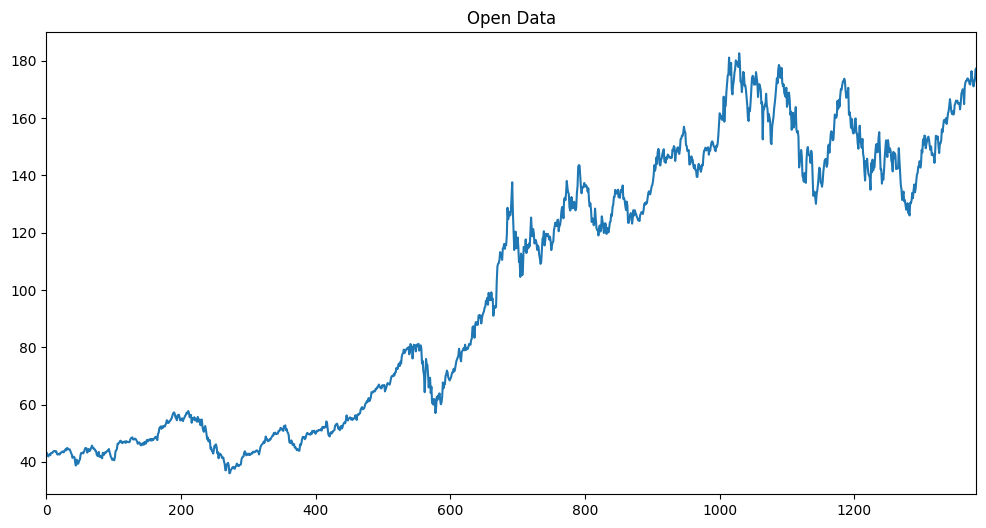

In [6]:
df['Open'].plot(figsize=(12,6),title='Open Data').autoscale(axis='x',tight=True)

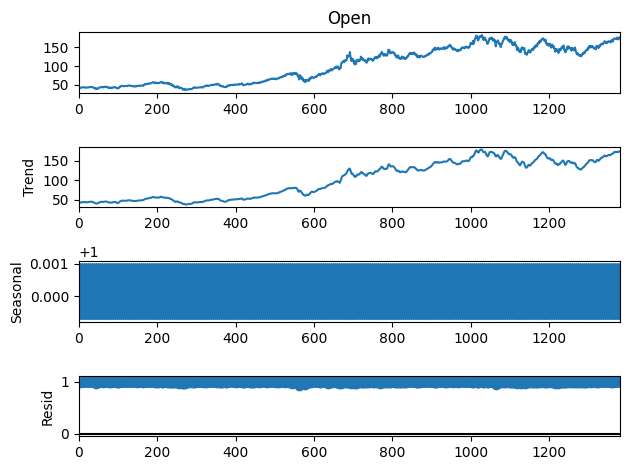

In [77]:
decompose_result = seasonal_decompose(df['Open'],model='multiplicative', period=5)
decompose_result.plot();

In [78]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [79]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Open'])

In [80]:
# Train the Holt Winters model
model = ExponentialSmoothing(train_data.Open,
                             trend="mul",
                             seasonal="mul",
                             seasonal_periods=5).fit()

In [72]:
# Train the Holt Winters model
model= ExponentialSmoothing(train_data.Open,
                             trend="add",
                             seasonal="add",
                             seasonal_periods=5).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [81]:
Predictions=model.forecast(test_size)

In [82]:
Pre_val=model.predict(len(df)-val_size, len(df)-1)

In [83]:
# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(len(df), len(df)+7-1)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)


Predicted closing prices for the next 7 days:
1382    214.882261
1383    214.994506
1384    215.123742
1385    215.691596
1386    215.575150
1387    215.996982
1388    216.109809
dtype: float64


<Axes: >

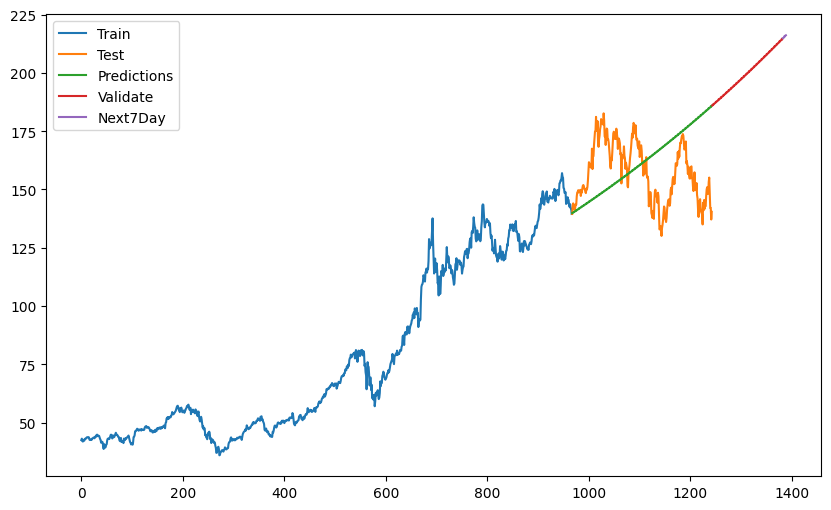

In [84]:
train_data['Open'].plot(legend=True, label='Train',figsize=(10,6))
test_data['Open'].plot(legend=True, label='Test')
Predictions.plot(legend=True, label='Predictions')
Pre_val.plot(legend=True, label='Validate')
y_next_7_days.plot(legend=True, label='Next7Day')
#test_pred_add.plot(legend=True, label='predicted_test_add')